In [38]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob

#########################################################################################################

In [13]:
# Import CSV
purple_csv = pd.read_csv("rawData/purpleAir_May2019.csv")

In [37]:
# Drop unecessary columns
purpleDF = purple_csv.drop(columns=['entry_id','PM1.0_CF_ATM_ug/m3','ADC','PM2.5_CF_1_ug/m3'])
# Convert time column to DateTime, convert from UTC TO PST
purpleDF['created_at'] =  pd.to_datetime(purpleDF['created_at'])
purpleDF['created_at'] = purpleDF['created_at'].dt.tz_convert('US/Pacific')
# Data Cleanup
purpleDF['Day-Month']=purpleDF.created_at.apply(lambda x: str(x)[5:10])
purpleDF.drop_duplicates(subset=['created_at'], keep=False)
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-09'] #Drop data from April 9th to the 29th
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-10']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-11']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-12']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-13']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-14']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-15']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-16']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-17']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-18']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-19']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-20']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-21']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-22']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-23']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-24']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-25']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-26']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-27']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-28']
purpleDF = purpleDF[purpleDF['Day-Month'] != '04-29']

purpleDF['created_at'] = pd.to_datetime(purpleDF['created_at'])
purpleDF = purpleDF.dropna()
# Average measurements by hours
purpleDF_H = purpleDF.resample('H', on='created_at').mean().reset_index() # https://chrisalbon.com/python/data_wrangling/pandas_group_data_by_time/
purpleDF_H = purpleDF_H.dropna()

print(purpleDF_H.dtypes)
print('*********************************')
print(purpleDF_H.shape)
print('*********************************')
print(purpleDF_H.corr())
print('*********************************')
print(purpleDF_H['PM2.5_CF_ATM_ug/m3'].describe())
print('*********************************')
purpleDF_H.tail(5)

created_at             datetime64[ns, US/Pacific]
PM2.5_CF_ATM_ug/m3                        float64
PM10.0_CF_ATM_ug/m3                       float64
UptimeMinutes                             float64
Temperature_F                             float64
Humidity_%                                float64
dtype: object
*********************************
(300, 6)
*********************************
                     PM2.5_CF_ATM_ug/m3  PM10.0_CF_ATM_ug/m3  UptimeMinutes  \
PM2.5_CF_ATM_ug/m3             1.000000             0.993614      -0.234479   
PM10.0_CF_ATM_ug/m3            0.993614             1.000000      -0.216938   
UptimeMinutes                 -0.234479            -0.216938       1.000000   
Temperature_F                 -0.007101            -0.013514      -0.046204   
Humidity_%                     0.238335             0.224767       0.084314   

                     Temperature_F  Humidity_%  
PM2.5_CF_ATM_ug/m3       -0.007101    0.238335  
PM10.0_CF_ATM_ug/m3      -0.013514  

,created_at,PM2.5_CF_ATM_ug/m3,PM10.0_CF_ATM_ug/m3,UptimeMinutes,Temperature_F,Humidity_%
300,2019-05-12 12:00:00-07:00,5.616889,6.261778,180.0,66.200000,55.866667
301,2019-05-12 13:00:00-07:00,6.309778,6.888000,240.0,67.000000,54.155556
302,2019-05-12 14:00:00-07:00,5.912667,6.377556,300.0,66.933333,54.733333
303,2019-05-12 15:00:00-07:00,6.624667,7.214222,360.0,68.066667,53.622222
304,2019-05-12 16:00:00-07:00,7.527556,8.164889,420.0,67.488889,54.155556


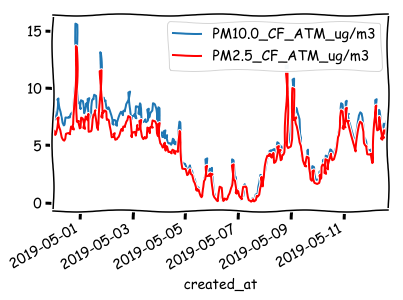

In [29]:
with plt.xkcd():

    # gca stands for 'get current axis'
    ax = plt.gca()

    purpleDF_H.plot(kind='line',x='created_at',y='PM10.0_CF_ATM_ug/m3',ax=ax)
    purpleDF_H.plot(kind='line',x='created_at',y='PM2.5_CF_ATM_ug/m3', color='red', ax=ax)
        
    plt.show()

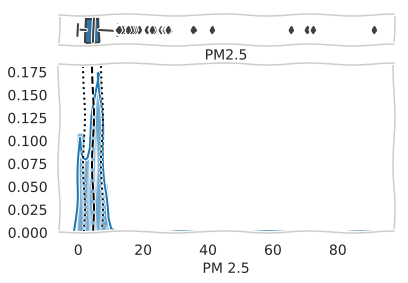

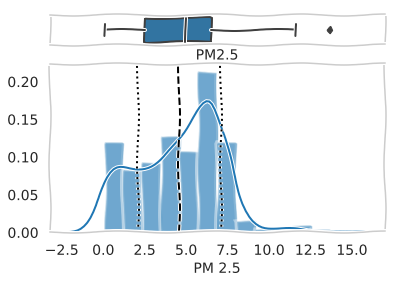

In [32]:
with plt.xkcd():
    ## Histogram of values averaged per hours
    # gca stands for 'get current axis'
#     ax = plt.gca()

#     purpleDF_H.plot(kind='hist',x='created_at',y='PM2.5_CF_ATM_ug/m3', color='red', ax=ax)
        
#     plt.show()
    #############################
    ## Histogram of the raw values (taken every 2-3 mins)
    sns.set_style("whitegrid")
    pm25_m = purpleDF['PM2.5_CF_ATM_ug/m3'].mean()
    pm25_std1 = pm25_m + purpleDF['PM2.5_CF_ATM_ug/m3'].std()
    pm25_std2 = pm25_m - purpleDF['PM2.5_CF_ATM_ug/m3'].std()
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(purpleDF['PM2.5_CF_ATM_ug/m3'], ax=ax_box)
    sns.distplot(purpleDF['PM2.5_CF_ATM_ug/m3'], ax=ax_hist)
    plt.axvline(pm25_m, linestyle="dashed",color='black')
    plt.axvline(pm25_std1, linestyle="dotted",color='black')
    plt.axvline(pm25_std2, linestyle="dotted",color='black')



    ax_box.set(xlabel='PM2.5')

    
    plt.xlabel('PM 2.5')
    #############################
    ## Histogram of the raw values (taken every hour)
    sns.set_style("whitegrid")
    H_pm25_m = purpleDF_H['PM2.5_CF_ATM_ug/m3'].mean()
    H_pm25_std1 = H_pm25_m + purpleDF_H['PM2.5_CF_ATM_ug/m3'].std()
    H_pm25_std2 = H_pm25_m - purpleDF_H['PM2.5_CF_ATM_ug/m3'].std()
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(purpleDF_H['PM2.5_CF_ATM_ug/m3'], ax=ax_box)
    sns.distplot(purpleDF_H['PM2.5_CF_ATM_ug/m3'], ax=ax_hist)
    plt.axvline(H_pm25_m, linestyle="dashed",color='black')
    plt.axvline(H_pm25_std1, linestyle="dotted",color='black')
    plt.axvline(H_pm25_std2, linestyle="dotted",color='black')



    ax_box.set(xlabel='PM2.5')

    
    plt.xlabel('PM 2.5')

######################################################################################################

In [39]:
# Import all CSVs at once into one dataframe:
path = r'rawData/luftdatenRaw_May2019' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,sep=';')
    li.append(df)

luftDF_csv = pd.concat(li, axis=0, ignore_index=True)

In [43]:
# Data Cleanup:
luftDF = luftDF_csv.drop(columns=['durP1','ratioP1','P1','durP2','ratioP2','P2','PMS_P1','BMP_pressure',
                             'BME280_temperature','BME280_humidity','Max_cycle','Max_cycle','HPM_P1',
                             'HPM_P2','PMS_P2','Temp','Humidity','BMP_temperature','BME280_pressure'])
luftDF = luftDF.dropna()
luftDF['Time'] =  pd.to_datetime(luftDF['Time'])
luftDF['Time'] = luftDF['Time'].dt.tz_localize('utc').dt.tz_convert('US/Pacific')

# Sort by Days and Hours:
luftDF = luftDF.sort_values(by = 'Time') #If not sorted the timeseries will not chart correctly
luftDF['Day-Month']=luftDF.Time.apply(lambda x: str(x)[5:10])
luftDF = luftDF[luftDF['Day-Month'] != '05-13'] #Drop data for the 13th.
luftDF_H = luftDF.resample('H', on='Time').mean().reset_index()

print(luftDF_H.dtypes)
print('*********************************')
print(luftDF_H.shape)
print('*********************************')
print(luftDF_H.corr())
print('*********************************')
print(luftDF_H['SDS_P2'].describe())
print('*********************************')
luftDF_H.tail(5)

Time         datetime64[ns, US/Pacific]
SDS_P1                          float64
SDS_P2                          float64
Samples                         float64
Min_cycle                       float64
Signal                          float64
dtype: object
*********************************
(295, 6)
*********************************
             SDS_P1    SDS_P2   Samples  Min_cycle    Signal
SDS_P1     1.000000  0.842661  0.159038  -0.202258  0.183148
SDS_P2     0.842661  1.000000 -0.086335  -0.021017  0.191431
Samples    0.159038 -0.086335  1.000000  -0.943337 -0.243224
Min_cycle -0.202258 -0.021017 -0.943337   1.000000  0.243681
Signal     0.183148  0.191431 -0.243224   0.243681  1.000000
*********************************
count    295.000000
mean       3.301757
std        1.370771
min        0.842917
25%        2.245245
50%        3.056364
75%        4.404161
max        6.762500
Name: SDS_P2, dtype: float64
*********************************


,Time,SDS_P1,SDS_P2,Samples,Min_cycle,Signal
290,2019-05-12 19:00:00-07:00,14.421250,4.535000,1.760874e+06,80.083333,-69.000000
291,2019-05-12 20:00:00-07:00,13.286087,3.623478,1.725935e+06,81.869565,-69.913043
292,2019-05-12 21:00:00-07:00,15.597917,3.663333,1.733283e+06,81.375000,-71.083333
293,2019-05-12 22:00:00-07:00,15.294348,3.514348,1.752907e+06,80.391304,-68.608696
294,2019-05-12 23:00:00-07:00,15.666667,3.470833,1.769461e+06,80.041667,-68.791667


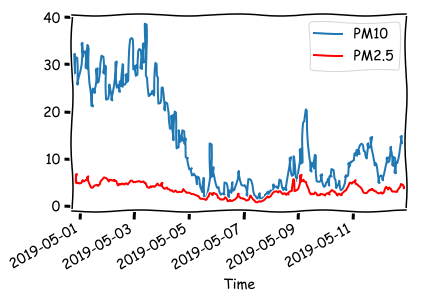

In [92]:
with plt.xkcd():

    # gca stands for 'get current axis'
    ax = plt.gca()

    luftDF_H.plot(kind='line',x='Time',y='SDS_P1',label='PM10',ax=ax)
    luftDF_H.plot(kind='line',x='Time',y='SDS_P2', color='red', label='PM2.5',ax=ax)
    
    plt.rcParams["figure.figsize"] = (20,50)
    plt.show()

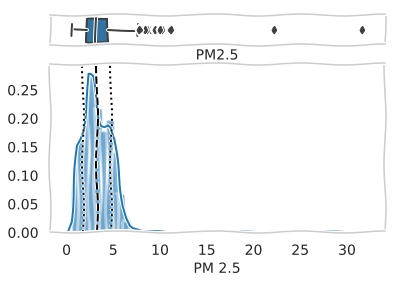

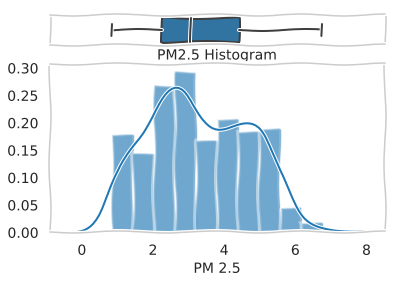

In [86]:
with plt.xkcd():
    #############################
    ## Histogram of the raw values (taken every 2-3 mins)
    sns.set_style("whitegrid")
    pm25_m = luftDF['SDS_P2'].mean()
    pm25_std1 = pm25_m + luftDF['SDS_P2'].std()
    pm25_std2 = pm25_m - luftDF['SDS_P2'].std()
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(luftDF['SDS_P2'], ax=ax_box)
    sns.distplot(luftDF['SDS_P2'], ax=ax_hist)
    plt.axvline(pm25_m, linestyle="dashed",color='black')
    plt.axvline(pm25_std1, linestyle="dotted",color='black')
    plt.axvline(pm25_std2, linestyle="dotted",color='black')



    ax_box.set(xlabel='PM2.5')

    
    plt.xlabel('PM 2.5')
    #############################
    ## Histogram of the raw values (taken every hour)
    sns.set_style("whitegrid")
    H_pm25_m = luftDF_H['SDS_P2'].mean()
    H_pm25_std1 = H_pm25_m + luftDF_H['SDS_P2'].std()
    H_pm25_std2 = H_pm25_m - luftDF_H['SDS_P2'].std()
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(luftDF_H['SDS_P2'], ax=ax_box)
    sns.distplot(luftDF_H['SDS_P2'], ax=ax_hist)
#     plt.axvline(H_pm25_m, linestyle="dashed",color='black')
#     plt.axvline(H_pm25_std1, linestyle="dotted",color='black')
#     plt.axvline(H_pm25_std2, linestyle="dotted",color='black')



    ax_box.set(xlabel='PM2.5 Histogram')

    
    plt.xlabel('PM 2.5')

###########################################################################################################

In [83]:
data = purpleDF_H.join(luftDF_H)
data = data.drop(columns=['created_at'])
data = data.resample('H', on='Time').mean().reset_index()
data = data.dropna()
data2 = data.rename(columns = {'PM2.5_CF_ATM_ug/m3':'PA_2.5','PM10.0_CF_ATM_ug/m3':'PA_10','SDS_P1':'LD_10','SDS_P2':'LD_2.5'})

data2.head()

,Time,PA_2.5,PA_10,UptimeMinutes,Temperature_F,Humidity_%,LD_10,LD_2.5,Samples,Min_cycle,Signal
0,2019-04-30 17:00:00-07:00,6.253556,7.932222,1074.666667,61.911111,60.400000,26.221364,4.302727,1.804588e+06,77.863636,-72.954545
1,2019-04-30 18:00:00-07:00,6.288222,7.976222,1134.666667,61.888889,61.177778,26.552273,4.376818,1.809413e+06,77.500000,-72.863636
2,2019-04-30 19:00:00-07:00,5.913111,7.268000,1194.666667,61.177778,61.600000,32.235909,4.757273,1.818450e+06,77.227273,-72.909091
3,2019-04-30 20:00:00-07:00,6.438837,7.972326,1255.883721,61.883721,62.069767,28.164167,5.837917,1.821881e+06,77.416667,-73.625000
4,2019-04-30 21:00:00-07:00,7.450000,9.103111,1314.666667,61.488889,62.444444,31.573333,6.762500,1.808846e+06,78.125000,-74.166667


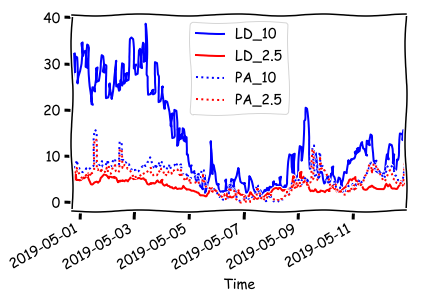

In [68]:
with plt.xkcd():

    # gca stands for 'get current axis'
    ax = plt.gca()

    data2.plot(kind='line',x='Time',y='LD_10',color='blue',ax=ax)
    data2.plot(kind='line',x='Time',y='LD_2.5', color='red', ax=ax)
    data2.plot(kind='line',style=':',x='Time',y='PA_10', color='blue', ax=ax)
    data2.plot(kind='line',style=':',x='Time',y='PA_2.5', color='red', ax=ax)
    
    plt.rcParams["figure.figsize"] = (20,30)
    
    plt.show()

#########################################################################################################

In [76]:
airnowDF = pd.read_csv("rawData/usEPA_pm25_2019.csv") #Source: https://www.epa.gov/outdoor-air-quality-data/download-daily-data#main-content
airnowDF = airnowDF.drop(columns=['POC','Site ID','Source','Site Name','DAILY_OBS_COUNT','PERCENT_COMPLETE',
                                 'AQS_PARAMETER_CODE','CBSA_NAME','STATE_CODE','COUNTY_CODE'])
airnowDF = airnowDF.dropna()
airnowDF['Date'] = pd.to_datetime(airnowDF['Date'])
start_date = '2019-04-30'
end_date = '2019-05-12'
mask = (airnowDF['Date'] >= start_date) & (airnowDF['Date'] <= end_date)
airnowDF = airnowDF.loc[mask]

# Resample to group by days
data_d = data.resample('D', on='Time').mean().reset_index()

airnowDF.tail()

,Date,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,AQS_PARAMETER_DESC,CBSA_CODE,STATE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
123,2019-05-08,5.0,ug/m3 LC,21,PM2.5 - Local Conditions,41860,California,San Mateo,37.482934,-122.20337
124,2019-05-09,2.3,ug/m3 LC,10,PM2.5 - Local Conditions,41860,California,San Mateo,37.482934,-122.20337
125,2019-05-10,3.5,ug/m3 LC,15,PM2.5 - Local Conditions,41860,California,San Mateo,37.482934,-122.20337
126,2019-05-11,8.8,ug/m3 LC,37,PM2.5 - Local Conditions,41860,California,San Mateo,37.482934,-122.20337
127,2019-05-12,6.0,ug/m3 LC,25,PM2.5 - Local Conditions,41860,California,San Mateo,37.482934,-122.20337


/home/hypatia/.local/share/virtualenvs/hypatia-wv30oaHf/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


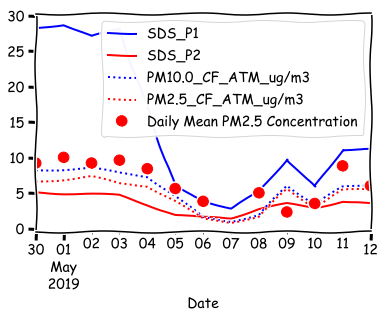

In [77]:
with plt.xkcd():

    # gca stands for 'get current axis'
    ax = plt.gca()

    data_d.plot(kind='line',x='Time',y='SDS_P1',color='blue',ax=ax)
    data_d.plot(kind='line',x='Time',y='SDS_P2', color='red', ax=ax)
    data_d.plot(kind='line',style=':',x='Time',y='PM10.0_CF_ATM_ug/m3', color='blue', ax=ax)
    data_d.plot(kind='line',style=':',x='Time',y='PM2.5_CF_ATM_ug/m3', color='red', ax=ax)
    airnowDF.plot(kind='line',style='.', markersize=20,x='Date',y='Daily Mean PM2.5 Concentration',color='red',ax=ax)
    
    plt.rcParams["figure.figsize"] = (10,30)
    
    plt.show()

In [ ]:
########## Cross Correlation of PM2.5 over 24 hours between PurpleAir & Luftdaten's records ###############

In [79]:
# Source: https://www.kaggle.com/dedecu/cross-correlation-time-lag-with-pandas
fields = ['Time','PA_2.5','LD_2.5'] # mdct is datetime 
x = data2[fields]
x.head(10)

x.corr()

,PA_2.5,LD_2.5
PA_2.5,1.000000,0.588635
LD_2.5,0.588635,1.000000


In [80]:
def df_derived_by_shift(data2,lag=0,NON_DER=[]):
    data = data2.copy()
    if not lag:
        return data
    cols ={}
    for i in range(1,lag+1):
        for x in list(data.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=data.index)    
        i = 1
        for c in columns:
            dfn[c] = data[k].shift(periods=i)
            i+=1
        data = pd.concat([data, dfn], axis=1, join_axes=[data.index])
    return data

In [81]:
NON_DER = ['Time',]
df_new = df_derived_by_shift(x, 24, NON_DER)
df_new = df_new.dropna()

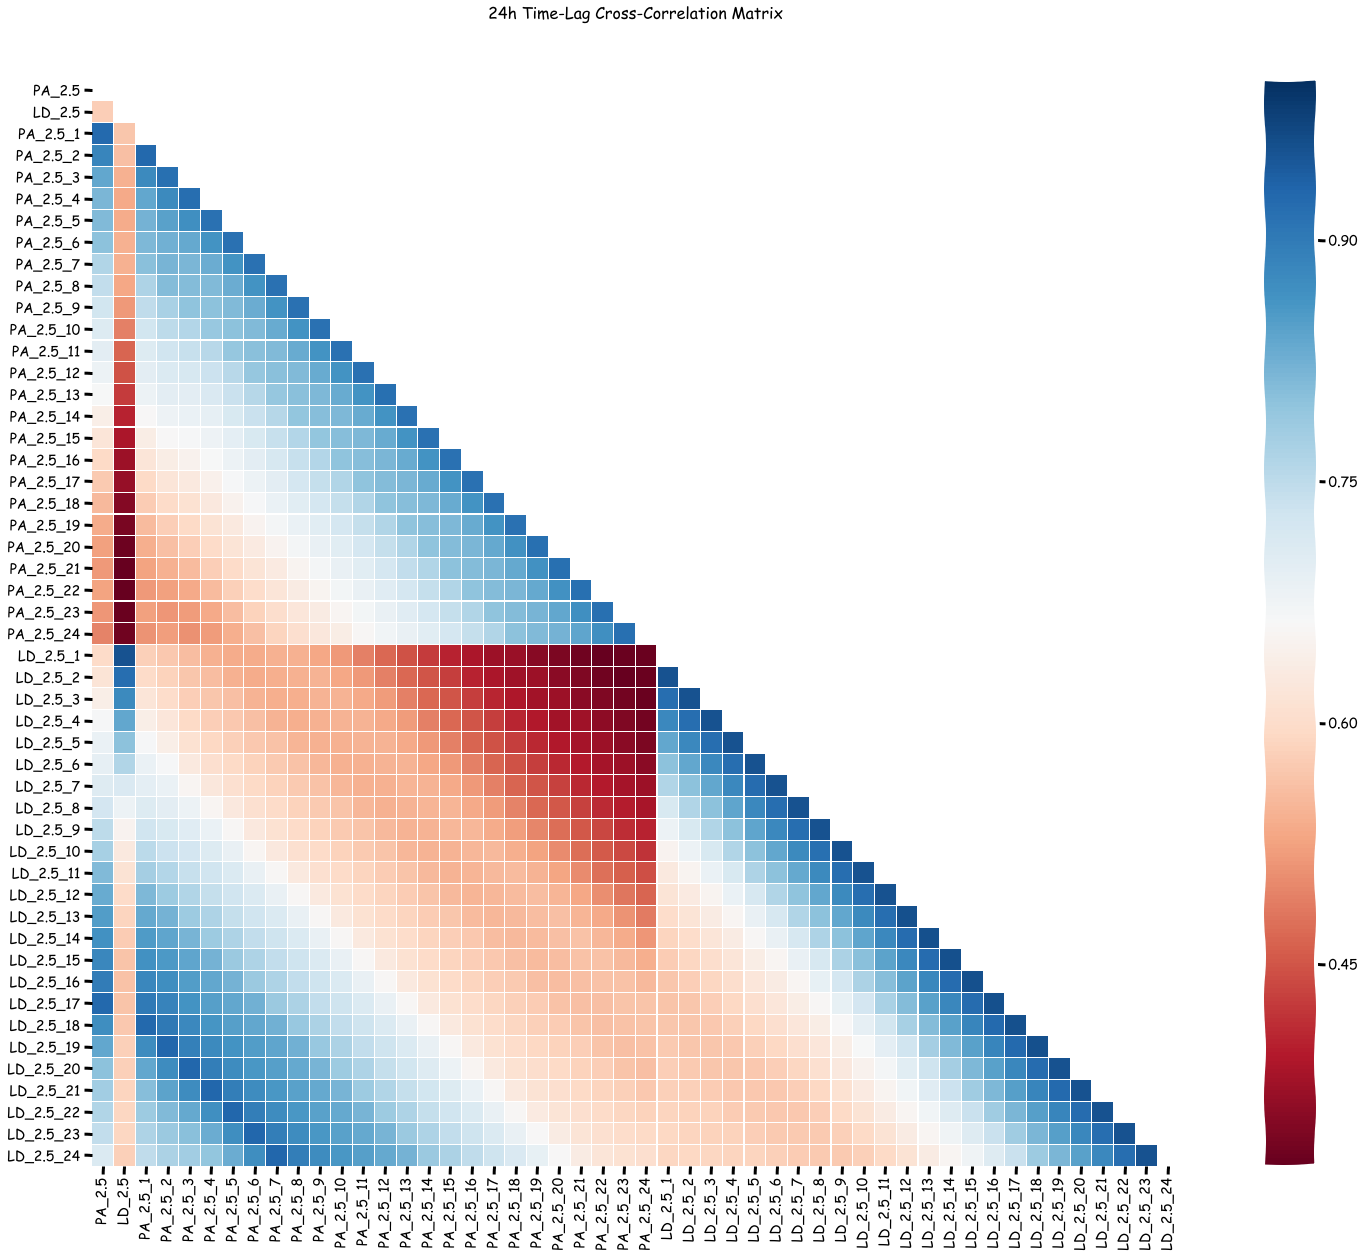

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

with plt.xkcd():
    colormap = plt.cm.RdBu
    plt.figure(figsize=(30,20))
    plt.title(u'24h Time-Lag Cross-Correlation Matrix', y=1.05, size=16)

    mask = np.zeros_like(df_new.corr())
    mask[np.triu_indices_from(mask)] = True

    svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
                square=True, cmap=colormap, linecolor='white', annot=False)